In [213]:
import pandas as pd
import numpy as np

import importlib
import useful
importlib.reload(useful)

import matplotlib
import matplotlib.pyplot as plt
#parameter to use Latex in matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#a plot label should be easy to read
plt.rcParams.update({'font.size': 14})

## Read one day of data

In [188]:
df = useful.read_day("apr01.dat")

    u_1   v_1   w_1     T_1   u_2   v_2   w_2     T_2   u_5   v_5  ...  w_15  \
0  5.14  1.39  0.10  277.72  5.12  1.55 -0.06  278.06  6.24  2.02  ... -0.31   
1  5.02  1.30  0.13  277.68  5.20  1.96  0.19  278.12  6.41  1.93  ... -0.52   
2  5.00  1.30 -0.01  277.72  4.90  1.67 -0.08  278.04  6.53  1.76  ... -0.60   
3  4.87  1.26 -0.10  277.72  4.72  1.88 -0.05  278.07  6.50  1.75  ... -0.60   
4  5.01  1.09 -0.16  277.71  4.64  1.82  0.02  278.13  6.67  1.49  ... -0.63   

     T_15  u_20  v_20  w_20    T_20  u_30  v_30  w_30    T_30  
0  280.23  9.47  3.97 -0.20  280.24  9.68  4.47  0.01  280.72  
1  280.11  9.22  3.90 -0.08  280.27  9.65  4.42  0.00  280.71  
2  280.17  9.21  4.00 -0.09  280.27  9.48  4.25 -0.08  280.57  
3  280.17  9.22  3.91 -0.13  280.32  9.66  4.40 -0.02  280.67  
4  280.15  9.26  3.99 -0.10  280.27  9.55  4.30 -0.05  280.74  

[5 rows x 28 columns]


NB: in df i don't have time (but can use data number) - yet it is there in the rotation algorithm

per hour it's 7 tables of u,v,w,T to which apply rotations (it's the seven heights) [an hour is 2.16e5 rows]

## Sketch of the analysis

In [9]:
# separate in 10 hours


# separate in 7 heights


# on one height: 
#   - plot u,v,w (just to start)
#   - rotate hourly
#   - test the rotation (assertion -> no im just plotting the value)
#   - plot u,v,w,T, \sigma^2_u, \sigma^2_w, \sigma^2_uw, \sigma^2_wT #componenti dell'energia cinetica e flusso (u,w)

# second part:
#   - spettro e cospettro
#   - sigma quadro da integrale

### split data in matrices

In [10]:
df_matrix = useful.split_dataframe(df, 10, 7)

In [11]:
df_matrix[0][0]

,u_1,v_1,w_1,T_1
0,5.14,1.39,0.10,277.72
1,5.02,1.30,0.13,277.68
2,5.00,1.30,-0.01,277.72
3,4.87,1.26,-0.10,277.72
4,5.01,1.09,-0.16,277.71
...,...,...,...,...
215995,3.52,2.69,0.55,276.44
215996,3.66,2.73,0.37,276.34
215997,3.55,2.82,0.41,276.46
215998,4.13,2.53,0.07,276.78


### split data in dictionaries (will be using this)

In [191]:
row_keys = ["h20","h21","h22","h23","h0","h1","h2","h3","h4","h5"] #hour of measurement
col_keys = ["z1", "z2", "z5", "z10", "z15", "z20", "z30"] #livelli FLOSS
df_matrix_dict = useful.split_dataframe_dict(df, 10, 7, row_keys, col_keys)

In [175]:
df_matrix_dict["h5_z30"] 

# in (i,j): f"{row_keys[i]}_{col_keys[j]}" to iterate
# or for key, chunk in df_dict.items():
#    print(f"\nDataFrame {key}:")
#    print(chunk)

,u_30,v_30,w_30,T_30
1944000,-0.93,6.55,-0.03,276.57
1944001,-0.96,6.57,-0.01,276.56
1944002,-0.96,6.57,-0.03,276.56
1944003,-0.94,6.59,-0.03,276.58
1944004,-1.02,6.57,-0.03,276.59
...,...,...,...,...
2159995,-3.85,5.31,0.31,275.02
2159996,-4.01,5.31,0.31,275.04
2159997,-3.85,5.40,0.30,275.03
2159998,-3.77,5.48,0.29,275.00


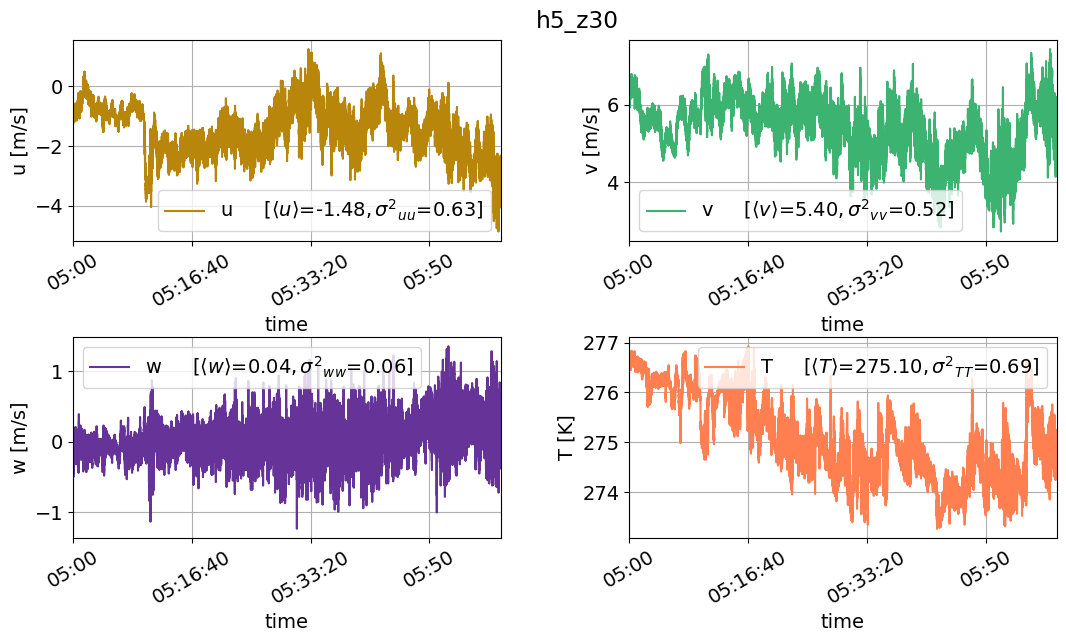

In [176]:
useful.plotHour(df_matrix_dict, hour= "h5", height = "z30")

## Rotation

In [194]:
df_matrix_dict["h5_z30"] = useful.rotateHour(df_matrix_dict, hour= "h5", height = "z30")

In [195]:
df_matrix_dict["h5_z30"]

,u_30,v_30,w_30,T_30
1944000,6.562963,-0.833803,-0.024334,276.57
1944001,6.590320,-0.808850,-0.006198,276.56
1944002,6.590165,-0.810208,-0.026151,276.56
1944003,6.604183,-0.834725,-0.024591,276.58
1944004,6.605987,-0.752474,-0.030203,276.59
...,...,...,...,...
2159995,6.139542,2.325891,0.104702,275.02
2159996,6.181734,2.479849,0.093895,275.04
2159997,6.226276,2.301487,0.095665,275.03
2159998,6.282268,2.202740,0.091927,275.00


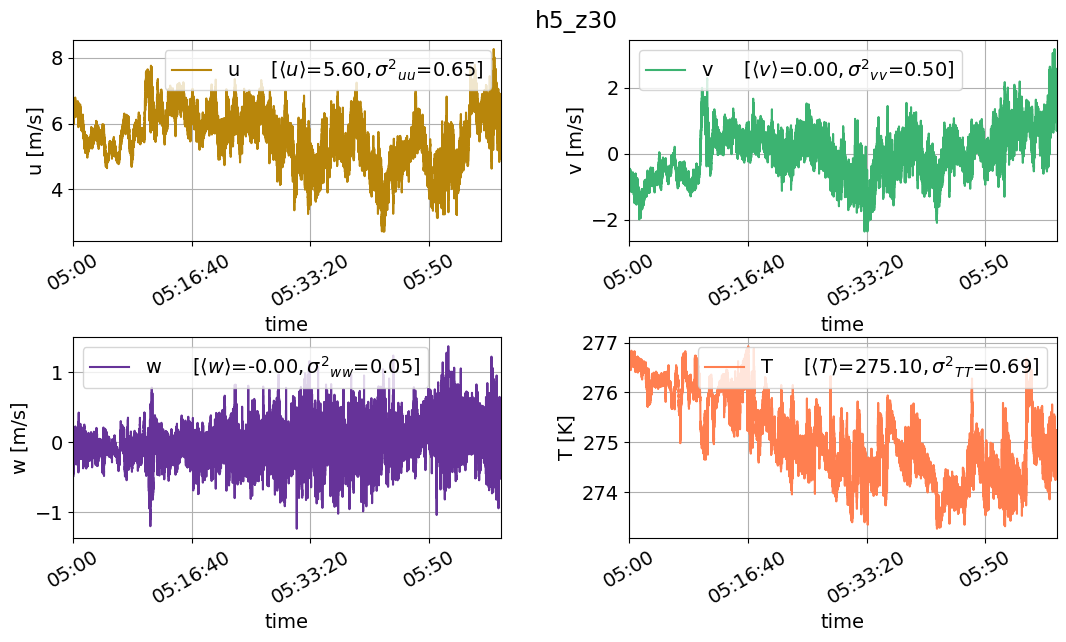

In [196]:
useful.plotHour(df_matrix_dict, hour= "h5", height = "z30")

## Covarianza

In [201]:
covmat = np.cov(df_matrix_dict["h5_z30"].values,rowvar=False)
print(covmat)

[[ 6.51908258e-01  2.36527488e-01 -5.03899950e-02  3.78975550e-01]
 [ 2.36527488e-01  5.04895780e-01 -5.33731910e-18 -4.96202925e-02]
 [-5.03899950e-02 -5.33731910e-18  5.46453484e-02 -5.84562002e-02]
 [ 3.78975550e-01 -4.96202925e-02 -5.84562002e-02  6.85336962e-01]]


In [215]:
from IPython.display import display, Markdown

a = 1.23
b = 4.56
c = 7.89
d = 0.12

table_latex = f"""
\\
\\begin{{array}}{{|c|c|}}
\\hline
\\textbf{{energia/flussi}} & \\textbf{{valori}} \\\\
\\hline
\\text{{$\sigma^2$$_u$$_u$}} & {covmat[0,0]:.4f} \\\\
\\hline
\\text{{$\sigma^2$$_w$$_w$}} & {covmat[2,2]:.4f} \\\\
\\hline
\\text{{$\sigma^2$$_u$$_w$}} & {covmat[0,2]:.4f} \\\\
\\hline
\\text{{$\sigma^2$$_w$$_T$}} & {covmat[2,3]:.4f} \\\\
\\hline
\\end{{array}}
\
"""

display(Markdown(table_latex))



\
\begin{array}{|c|c|}
\hline
\textbf{energia/flussi} & \textbf{valori} \\
\hline
\text{$\sigma^2$$_u$$_u$} & 0.6519 \\
\hline
\text{$\sigma^2$$_w$$_w$} & 0.0546 \\
\hline
\text{$\sigma^2$$_u$$_w$} & -0.0504 \\
\hline
\text{$\sigma^2$$_w$$_T$} & -0.0585 \\
\hline
\end{array}


## Spettri e Cospettri 

I need an algorithm that
1. performs dft on u,w,T
2. plots the transforms - no

Then go on spectra
3. evaluates E_{uu}, E_{ww}, E_{uw}, E_{wT} of the dfts
4. plots the spectral functions E
5. fits the -5/3 trend on high energies (and maybe trends on T)
6. integrates them to get the sigmas back (which percentage)

Questions/flexibilities: 
- trovo -3/5
- normalization of mean and variance of signal before dft-ing -> if mean(signal) is zero, spectum[0]= very low disregarding sigma... like it just scales with sigma but was 0...?
- which algorithm of dft
- premultiplied? scale to display?

In [287]:
def CalcPowerSpectrum(dataframe, hour= "h20", height = "z1",  normalize = False, quantity='u' ):
    hour_loc = hour + "_" + height
    quantityIndex = {
        'u'       : 0, 
        'v'       : 1, 
        'w'       : 2, 
        'T'       : 3
    }
    signal = dataframe[hour_loc].iloc[:,quantityIndex[quantity]].values
    if normalize :
        signal = signal - np.mean(signal)
        signal = signal / np.std(signal)
    
    signal_fft = np.fft.fft(signal)

    # Compute the corresponding frequencies
    sampling_rate = 60     # 60 Hz
    T = 3600               # 1hour duration
    N = int(T * sampling_rate)  # Number of samples
    frequencies = np.fft.fftfreq(N, 1/sampling_rate) #freq 0 is the mean!

    # Take the magnitude (absolute value) of the FFT
    power_spectrum = np.abs(signal_fft)

    # Since the FFT output is symmetric for real data, keep only the positive frequencies
    half_N = N // 2  # Half the number of points, since FFT is symmetric
    frequencies = frequencies[:half_N]
    power_spectrum = power_spectrum[:half_N]
    print(f"mean of the signal is:{np.mean(signal)}", f"\n first data of powerspectrum are: {power_spectrum[0:5]}")
    return (frequencies, power_spectrum) #first frequency is 0

In [332]:
def plotPowerSpectra(dataframe, hour= "h20", height = "z1", normalize = False) :
    hour_loc = hour + "_" + height
    
    quantities = ['u','v','w','T']

    ylabels = [r'$E_{uu}$',r'$E_{vv}$ ',r'$E_{ww}$ ',r'$E_{TT}$ ']

    colors = ['darkgoldenrod','mediumseagreen','rebeccapurple', 'coral']

    fig,ax = plt.subplots(2,2,figsize=(12,6))
    axs = ax.flatten()

    #plot 
    for i in range(4):
        #mean_value = data[quantities[i]].mean()  # Calculate mean
        #var_value = data[quantities[i]].var()    # Calculate variance
        
        # Define the slope and y-intercept
        slope = -3/5
        y_intercept = 10e2  # you can change this if you want a different intercept

        # Calculate y values based on the slope
        # y = slope * x + y_intercept
        x_line = np.linspace(0.1, 30, 100)  # line x values
        y_line =  x_line**slope* y_intercept

        # Plot the diagonal line
        axs[i].plot(x_line, y_line, linestyle='--', color='red', label='y = -5/3 * x')
        
        
        freqs, powerSpectrum = CalcPowerSpectrum(dataframe, hour, height, normalize, quantity=quantities[i])
        
        axs[i].loglog(freqs,powerSpectrum, color=colors[i], )
                    #label=rf'{quantities[i]} $\quad$ [$\langle {quantities[i]} \rangle$={mean_value:.2f},$\,$$\sigma^2$$_{quantities[i]}$$_{quantities[i]}$={var_value:.2f}]')
        axs[i].grid(True)
        #axs[i].legend()
        #axs[i].set_xlim(time_index[timetoplots[0]].time(), time_index[timetoplots[1]].time())
        axs[i].set_xlabel("frequencies")
        axs[i].set_ylabel(ylabels[i])
        #axs[i].tick_params(axis='x', labelrotation=30)
        
    fig.suptitle(f"Power spectra of {hour_loc}")
    plt.subplots_adjust(left=0.08, bottom=0.1, right=0.9, top=0.93, wspace=0.3, hspace=0.30)
    plt.show()

mean of the signal is:5.598593989241382 
 first data of powerspectrum are: [1209296.30167614   71636.27165021   12145.8385905    28238.3356865
   34180.50461879]
mean of the signal is:3.789561257387201e-17 
 first data of powerspectrum are: [4.70734562e-12 1.99232652e+04 5.35781442e+04 3.31078677e+04
 3.62801461e+04]
mean of the signal is:-2.3026847918151394e-18 
 first data of powerspectrum are: [5.55111512e-13 1.20150980e+04 7.23007405e+03 4.90246304e+03
 1.28418026e+03]
mean of the signal is:275.09614847222224 
 first data of powerspectrum are: [5.94207681e+07 9.49560168e+04 3.87090643e+04 1.88408740e+04
 1.14861169e+04]


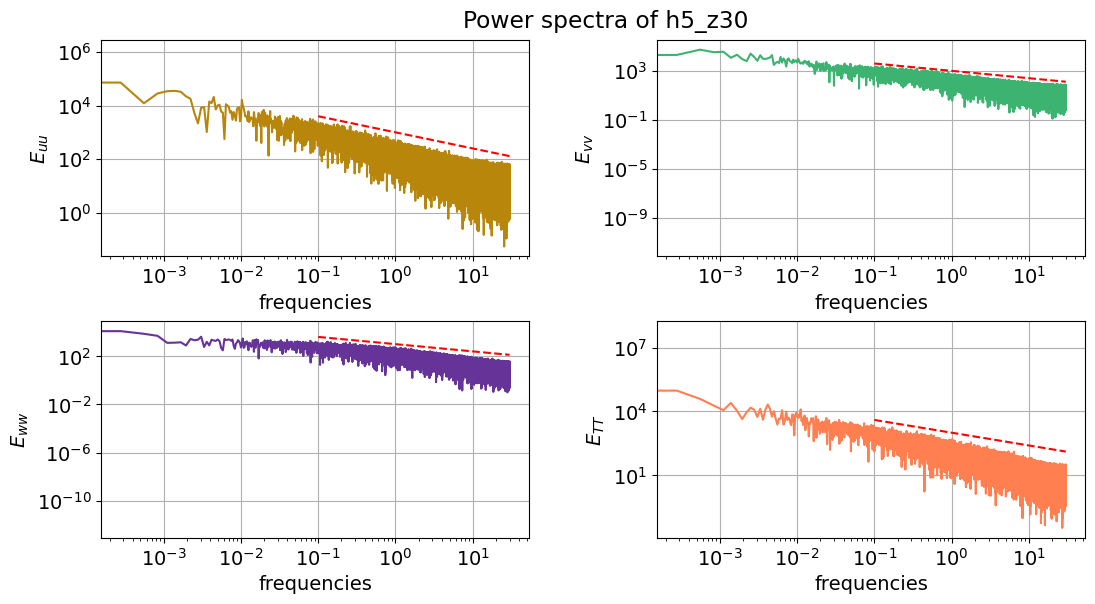

In [333]:
plotPowerSpectra(df_matrix_dict, hour= "h5", height = "z30", normalize = False)

For the ATTO data, the ε(z) values were computed from the longitudinal velocity spectrum
Euu(k) in the ISR using Taylor’s frozen turbulence hypothesis to convert f to k, where the
wavenumber k = 2π f /U.

https://numpy.org/devdocs/reference/generated/numpy.fft.fft.html
https://numpy.org/devdocs/reference/generated/numpy.fft.fftfreq.html

In [244]:
frequencies: # 30s come max, 60 / 216000 come min ->2.7periodico e-4 + lo zero

array([0.00000000e+00, 2.77777778e-04, 5.55555556e-04, ...,
       2.99991667e+01, 2.99994444e+01, 2.99997222e+01])

In [245]:
z[0]

1209296.3016761385

mean of the signal is:2.2167015277777775 
 first data of powerspectrum are: [478807.53       295148.56048286 127732.67788799  50541.14745588
  49908.84168393]
mean of the signal is:1.6126889814814813 
 first data of powerspectrum are: [348340.82       124921.17918651  44202.08937468  21030.27458525
  43495.20564058]
mean of the signal is:0.003148148148148149 
 first data of powerspectrum are: [ 680.         1187.70105778  549.29603961  800.70767923  792.61106103]
mean of the signal is:274.5585026851852 
 first data of powerspectrum are: [5.93046366e+07 2.00908374e+05 7.78907459e+04 2.71064362e+04
 3.53864448e+04]


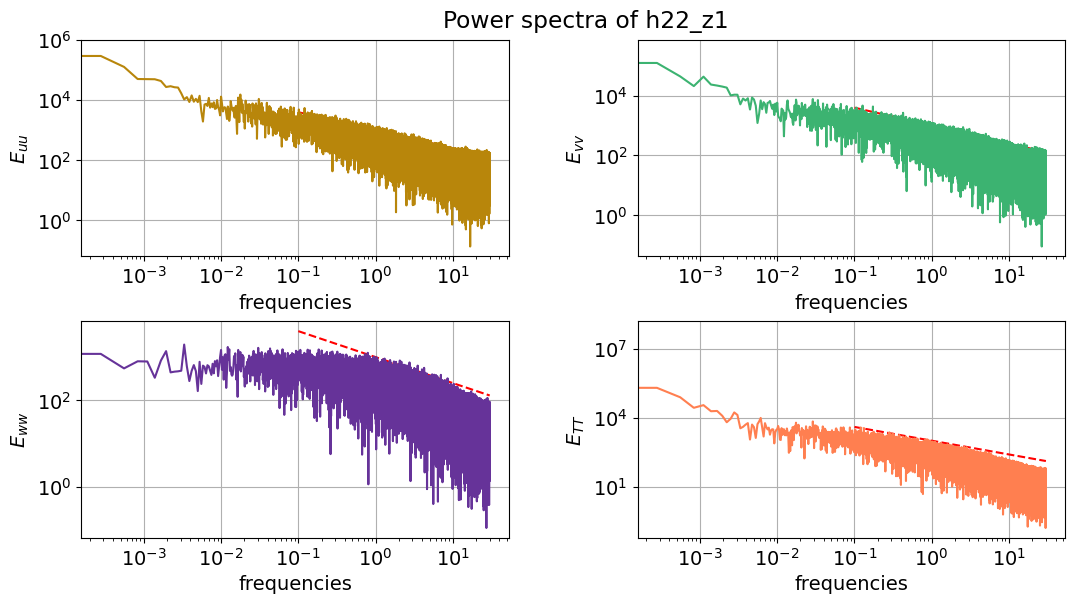

In [325]:
plotPowerSpectra(df_matrix_dict, hour= "h22", height = "z1", normalize = False)
